In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')


2024-06-15 12:11:59.150077: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-15 12:11:59.153680: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 12:11:59.158386: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-15 12:11:59.217921: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-15 12:12:00.427323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [ ]:
# Load an image from the data folder to display in the notebook
from IPython.display import Image
Image(filename='data/test/NORMAL/IM-0001-0001.jpeg')

In [ ]:
# Make a cnn to predict if a x-ray of the lungs has pneumonia or not
# Load the data
train_dir = 'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

# Check the number of images in each folder
print('Number of images in training set:', len(os.listdir(train_dir+"/NORMAL")) + len(os.listdir(train_dir+"/PNEUMONIA")))
print('Number of images in test set:', len(os.listdir(test_dir+"/NORMAL")) + len(os.listdir(test_dir+"/PNEUMONIA")))
print('Number of images in validation set:', len(os.listdir(val_dir+"/NORMAL")) + len(os.listdir(val_dir+"/PNEUMONIA")))

# Load the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data
train_data = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')

# Create a cnn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a cnn
cnn = Sequential()

# Add the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Add the first pooling layer
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Add the second convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))


# Add the second pooling layer
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Add the flattening layer
cnn.add(Flatten())

# Add the fully connected layer
cnn.add(Dense(units=128, activation='relu'))

# Add the output layer
cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the cnn
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the cnn
cnn.fit(train_data, validation_data=test_data, epochs=25)

# Save the model
cnn.save('model/pneumonia_cnn.h5')



In [ ]:
# Predict if a person has pneumonia or not

# Load the model
from tensorflow.keras.models import load_model
cnn = load_model('model/pneumonia_cnn.h5')

from tensorflow.keras.preprocessing import image

def predict_pneumonia(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = cnn.predict(img)
    if prediction == 1:
        return 'Pneumonia'
    else:
        return 'Normal'


# Show a plot where you see both images and there classification of all the images in the validation set
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

amount_of_val_images = len(os.listdir(val_dir + '/NORMAL')) + len(os.listdir(val_dir + '/PNEUMONIA'))

for i in range(amount_of_val_images):
    img_path = val_dir + '/NORMAL/' + os.listdir(val_dir + '/NORMAL')[i]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    # show the prediction
    prediction = predict_pneumonia(img_path)
    plt.xlabel(prediction) 
    plt.title(f'Predicted: {prediction}, actual: Normal')
   
    plt.show()

    img_path = val_dir + '/PNEUMONIA/' + os.listdir(val_dir + '/PNEUMONIA')[i]
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    prediction = predict_pneumonia(img_path)
    plt.xlabel(prediction) 
    plt.title(f'Predicted: {prediction}, actual: Pneumonia')
    plt.xlabel(predict_pneumonia(img_path))
    plt.show()
    


In [38]:
# see what the dimentions of the images are
img = mpimg.imread(val_dir + '/NORMAL/' + os.listdir(val_dir + '/NORMAL')[0])
print(img.shape)


(1416, 1776)


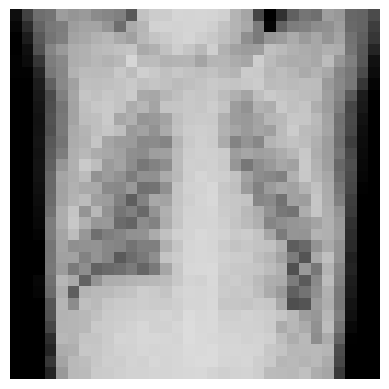

In [75]:
# load in the images and show me the first image together with its lable
from tensorflow.keras.preprocessing import image
img = image.load_img(val_dir + '/NORMAL/' + os.listdir(val_dir + '/NORMAL')[0], target_size=(32, 32))
img = image.img_to_array(img)
plt.imshow(img/255)
plt.axis('off')
plt.show()
